In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')

df1 = pd.read_csv('AppleStore.csv', encoding = 'utf8',index_col=0)
df2 = pd.read_csv('googleplaystore.csv', encoding = 'utf8')

# data cleaning

In [5]:
# iOS
# 移除 评分为0的项目 空值 重复项
df1 = df1[df1['user_rating']!=0]
df1 = df1.dropna()
df1 = df1.drop_duplicates()

In [6]:
# Google Play
# 移除Size异常值
df2 = df2[(df2[['Size']]!= 'Varies with device').all(axis=1)]
df2 = df2[(df2[['Size']]!= '1,000+').all(axis=1)]

# 换算Size 统一为kb
size=[]
for i in df2['Size']:
    if i.endswith("M"):
        i=round(float(i.replace("M",""))*1024,1)
        size.append(i)
    else:
        i=round(float(i.replace("k","")),1)
        size.append(i)
df2['Size']=size

# 移除 空值 重复项
df2 = df2.drop_duplicates()
df2 = df2.dropna()

# 清洗numeric variable 
df2['Reviews'] = pd.to_numeric(df2['Reviews'])
df2['Price'] = df2['Price'].apply(lambda x : x.strip('$'))
df2['Price'] = pd.to_numeric(df2['Price'])
df2['Installs'] = df2['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
df2['Installs'] = pd.to_numeric(df2['Installs'])

In [7]:
df2['Android Ver'][df2['Android Ver'] == 'Varies with device'] = '4.1 and up'
df2['android_ver_int'] = df2['Android Ver'].str[0:1].astype(int)

In [8]:
from datetime import datetime,date
temp=pd.to_datetime(df2['Last Updated'])
df2['last_updated_days'] = temp.apply(lambda x:date.today()-datetime.date(x))
df2['last_updated_days'] = [i.days for i in df2['last_updated_days']]

# DV - rating

Text(0, 0.5, 'count')

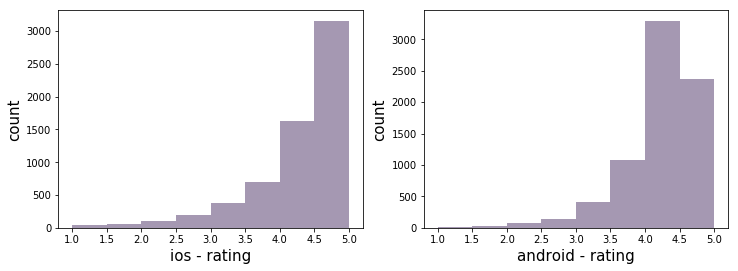

In [11]:
# 两个app store的rating分布
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(1,2,1)
ax1.hist(df1['user_rating'], color=(0.3, 0.2, 0.4, 0.5),bins=8)
ax1.set_xlabel('ios - rating',fontsize=15)
ax1.set_ylabel('count',fontsize=15)

ax1 = fig.add_subplot(1,2,2)
ax1.hist(df2['Rating'], color=(0.3, 0.2, 0.4, 0.5),bins=8)
ax1.set_xlabel('android - rating',fontsize=15)
ax1.set_ylabel('count',fontsize=15)

# IV - numerical variable

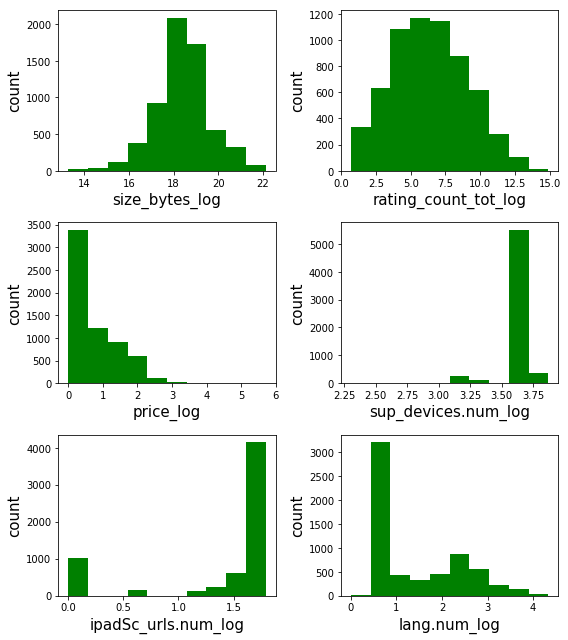

In [7]:
# iOS - distribution
feature_list1 = ['size_bytes','rating_count_tot','price','sup_devices.num','ipadSc_urls.num','lang.num']
for i in feature_list1:
    df1[i+'_log'] = np.log(df1[i]+1)

fig = plt.figure(figsize=(8,9))
for i in range(len(feature_list1)):
    ax = fig.add_subplot(3,2,i+1)
    ax.hist(df1[feature_list1[i]+'_log'],color='g')
    ax.set_xlabel(feature_list1[i]+'_log',fontsize=15) # 横轴加上'log'
    ax.set_ylabel('count',fontsize=15)
plt.tight_layout()
plt.show()

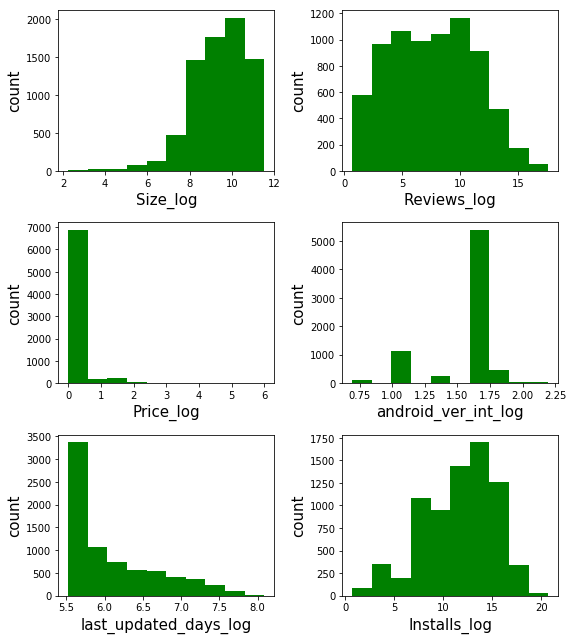

In [8]:
# Google Play - distribution
feature_list2 = ['Size','Reviews','Price','android_ver_int','last_updated_days','Installs']
for i in feature_list2:
    df2[i+'_log'] = np.log(df2[i]+1)

fig = plt.figure(figsize=(8,9))
for i in range(len(feature_list2)):
    ax = fig.add_subplot(3,2,i+1)
    ax.hist(df2[feature_list2[i]+'_log'],color='g')
    ax.set_xlabel(feature_list2[i]+'_log',fontsize=15) # 横轴加上'log'
    ax.set_ylabel('count',fontsize=15)
plt.tight_layout()
plt.show()

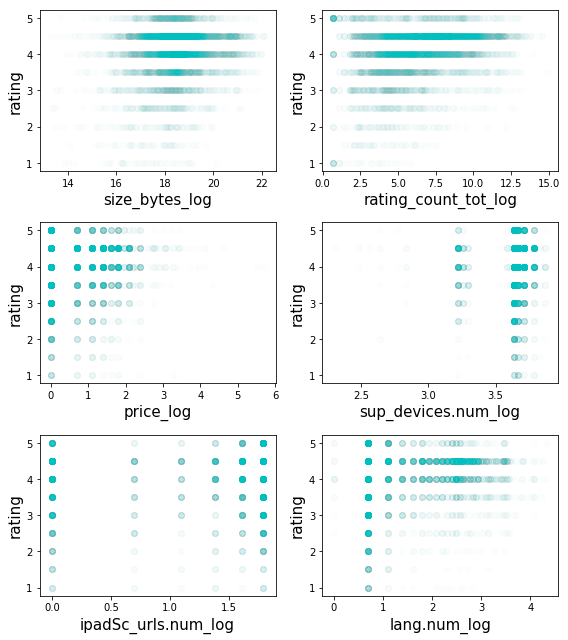

In [9]:
# iOS - Scatterplot
fig = plt.figure(figsize=(8,9))
for i in range(len(feature_list1)):
    ax = fig.add_subplot(3,2,i+1)
    ax.scatter(df1[feature_list1[i]+'_log'], df1['user_rating'], color='c', alpha=0.01)
    ax.set_xlabel(feature_list1[i]+'_log', fontsize=15)
    ax.set_ylabel('rating',fontsize=15)
plt.tight_layout()
plt.show()

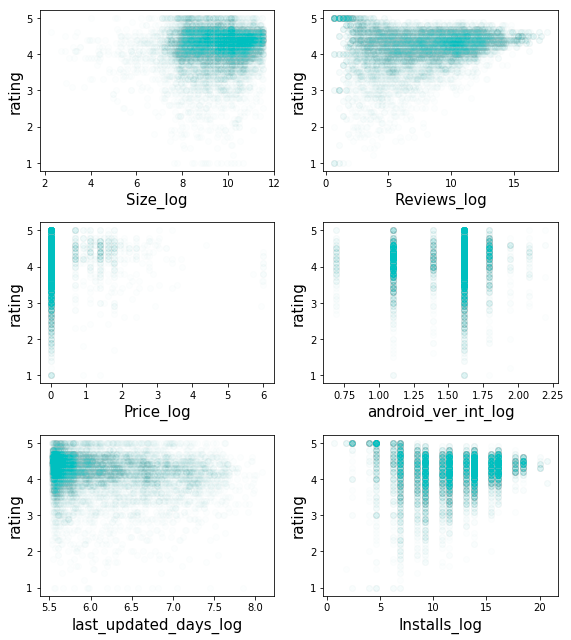

In [14]:
# Google Play - Scatterplot
fig = plt.figure(figsize=(8,9))
for i in range(len(feature_list2)):
    ax = fig.add_subplot(3,2,i+1)
    ax.scatter(df2[feature_list2[i]+'_log'], df2['Rating'], color='c', alpha=0.01)
    ax.set_xlabel(feature_list2[i]+'_log', fontsize=15)
    ax.set_ylabel('rating',fontsize=15)
plt.tight_layout()
plt.show()

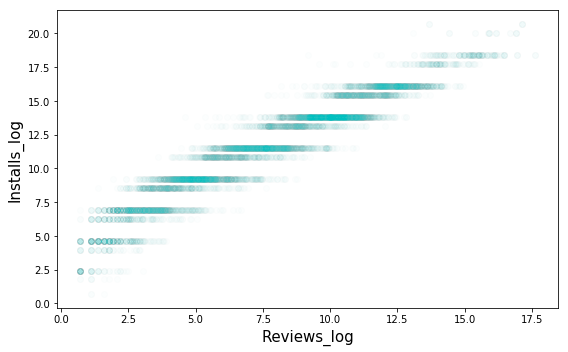

In [11]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(df2['Reviews_log'], df2['Installs_log'], color='c', alpha=0.01)
ax.set_xlabel('Reviews_log',fontsize=15)
ax.set_ylabel('Installs_log',fontsize=15)
plt.tight_layout()
plt.show()

# IV - categorical variable

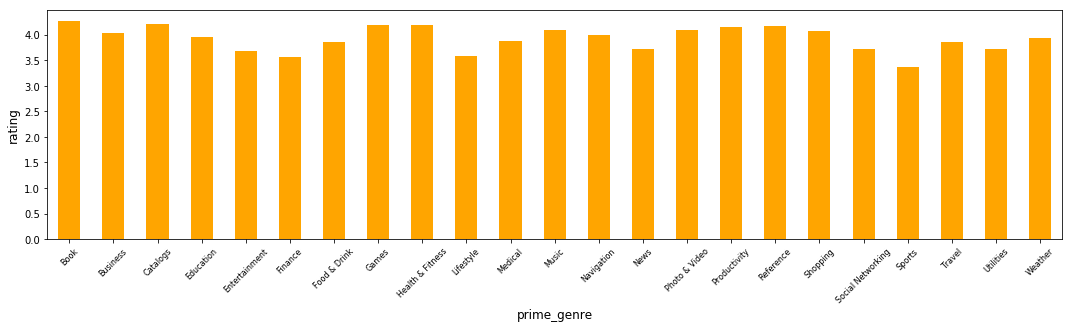

In [12]:
# iOS - category
categorical_features = ['prime_genre']

fig = plt.figure(figsize=(15,8))
for i in np.arange(len(categorical_features)):
    ax = fig.add_subplot(2,1,i+1)
    s = df1['user_rating'].groupby(df1[categorical_features[i]]).mean()
    s.plot.bar(color='orange',ax=ax)
    ax.set_xticklabels(s.index, fontsize=8, rotation=45)
    ax.set_xlabel(categorical_features[i],fontsize=12)
    ax.set_ylabel('rating',fontsize=12)

plt.tight_layout()
plt.show()

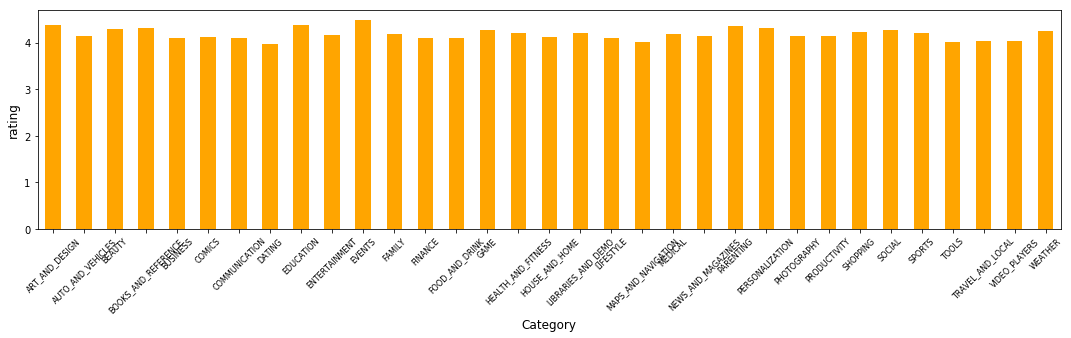

In [13]:
# Google Play - category
categorical_features = ['Category']

fig = plt.figure(figsize=(15,8))
for i in np.arange(len(categorical_features)):
    ax = fig.add_subplot(2,1,i+1)
    s = df2['Rating'].groupby(df2[categorical_features[i]]).mean()
    s.plot.bar(color='orange',ax=ax)
    ax.set_xticklabels(s.index, fontsize=8, rotation=45)
    ax.set_xlabel(categorical_features[i],fontsize=12)
    ax.set_ylabel('rating',fontsize=12)

plt.tight_layout()
plt.show()